<a href="https://colab.research.google.com/github/Amal642/HandWritten-Digits-Classification/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(y_train)

60000

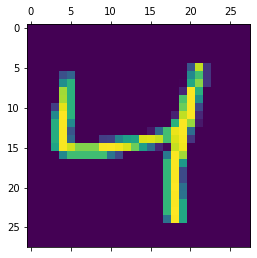

In [ ]:
plt.matshow(x_train[2])

In [ ]:
y_train[2]

4

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4666 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9258


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 987us/step - loss: 0.2651 - accuracy: 0.9257


[0.26510530710220337, 0.9257000088691711]

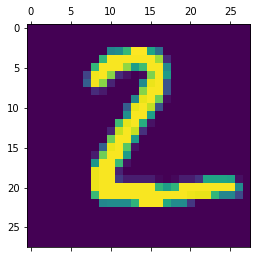

In [ ]:
plt.matshow(x_test[1])

In [ ]:
y_predict=model.predict(x_test_flattened)
y_predict[1]

array([5.5111825e-01, 4.0857196e-03, 9.9940503e-01, 3.5595873e-01,
       9.2299773e-10, 8.4237158e-01, 8.7397534e-01, 6.1555568e-13,
       1.6123542e-01, 2.3034479e-09], dtype=float32)

In [ ]:
np.argmax(y_predict[1])

2

In [64]:
y_prediction_labels=[np.argmax(i) for i in y_predict]

In [66]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    7,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  926,   15,   11,    4,   12,   10,   36,    3],
       [   4,    0,   21,  923,    0,   22,    2,   10,   21,    7],
       [   1,    1,    3,    1,  917,    0,   12,    4,   10,   33],
       [   8,    2,    4,   34,    7,  785,   12,    4,   30,    6],
       [  13,    3,    5,    1,    7,   16,  909,    2,    2,    0],
       [   1,    6,   23,    8,   10,    0,    0,  951,    2,   27],
       [   7,    7,    7,   21,    9,   30,    9,   12,  867,    5],
       [  11,    6,    1,   12,   31,    7,    0,   25,   10,  906]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

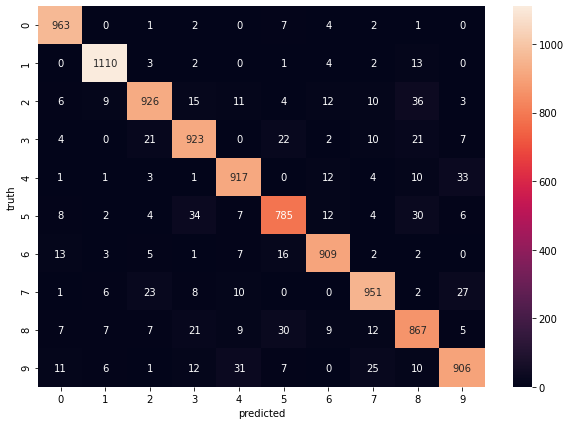

In [68]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

# Adding Hidden Layer

In [69]:
model = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation="sigmoid"),
        keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4166 - accuracy: 0.8942
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2065 - accuracy: 0.9410
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1547 - accuracy: 0.9560
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219 - accuracy: 0.9647
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9726


In [70]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1055 - accuracy: 0.9678


[0.10546938329935074, 0.9678000211715698]

Text(69.0, 0.5, 'truth')

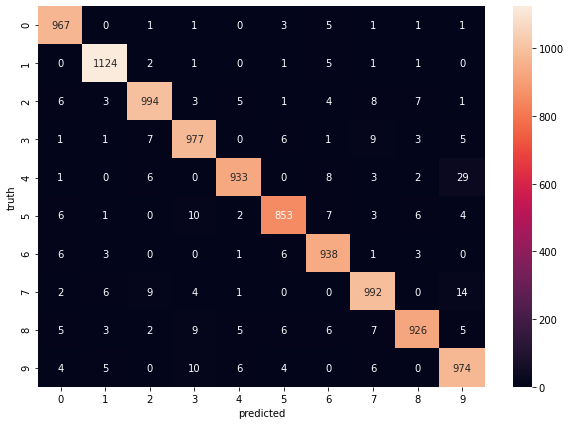

In [73]:
y_predict=model.predict(x_test_flattened)
y_prediction_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')


In [78]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=
                             (28,28)),
        keras.layers.Dense(100,activation="sigmoid"),
        keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4152 - accuracy: 0.8941
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2042 - accuracy: 0.9423
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1523 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1209 - accuracy: 0.9657
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0988 - accuracy: 0.9725
